In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

In [4]:
#load the data
path = r"/Users/binga17/Downloads/MSBA/3rd sem/Financial Analytics/Assignments/insurance.xlsx"
df = pd.read_excel(path)

In [8]:
#Cleaning the dataset column

df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(" ", "_"))

print("Columns:", list(df.columns))
print(df.head())


Columns: ['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region', 'expenses', 'premium']
   age  gender   bmi  children discount_eligibility     region  expenses  \
0   18    male  33.8         1                   no  southeast   1725.55   
1   18    male  34.1         0                   no  southeast   1137.01   
2   18  female  26.3         0                   no  northeast   2198.19   
3   18  female  38.7         2                   no  northeast   3393.36   
4   18  female  35.6         0                   no  northeast   2211.13   

   premium  
0  17.2555  
1  11.3701  
2  21.9819  
3  33.9336  
4  22.1113  


In [10]:
#Model Building
# Target = expenses (continuous)
# Predictors = age, bmi, children (numeric) + gender, discount_eligibility, region (categorical)
formula = "expenses ~ age + bmi + children + C(gender) + C(discount_eligibility) + C(region)"
model = smf.ols(formula=formula, data=df).fit()

print("\n=== MODEL FIT ===")
print("R-squared:", round(model.rsquared, 3))
print("Adj. R-squared:", round(model.rsquared_adj, 3))

print("\n=== COEFFICIENTS (p-values) ===")
for name, coef in model.params.items():
    print(f"{name:35s} {coef:10.3f}   p={model.pvalues[name]:.4f}")


=== MODEL FIT ===
R-squared: 0.751
Adj. R-squared: 0.749

=== COEFFICIENTS (p-values) ===
Intercept                           -11941.562   p=0.0000
C(gender)[T.male]                     -131.352   p=0.6933
C(discount_eligibility)[T.yes]       23847.477   p=0.0000
C(region)[T.northwest]                -352.790   p=0.4590
C(region)[T.southeast]               -1035.596   p=0.0307
C(region)[T.southwest]                -959.306   p=0.0449
age                                    256.839   p=0.0000
bmi                                    339.290   p=0.0000
children                               475.689   p=0.0006


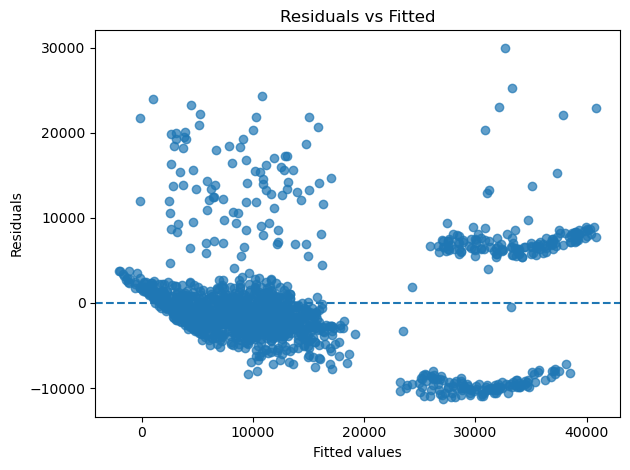

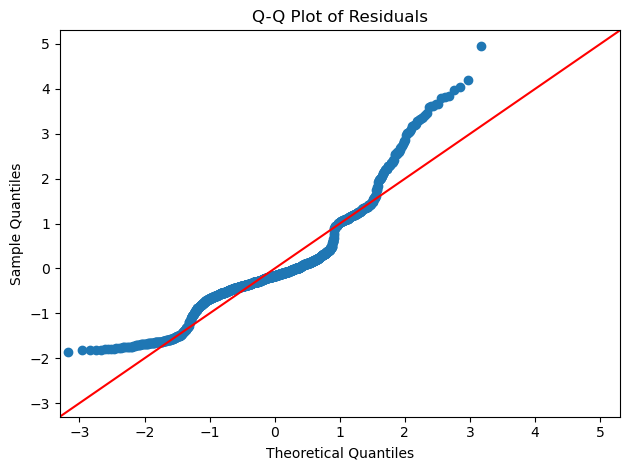

In [14]:
#Plots

# Residuals vs Fitted
plt.figure()
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

# Q-Q plot for residual normality
sm.qqplot(model.resid, line="45", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


In [20]:
#Outliers

influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

n = len(df)
threshold = 4 / n
suspects = [i for i, d in enumerate(cooks_d) if d > threshold]

print("\nINFLUENTIAL POINTS (Cook's D)")
print(f"Threshold (4/n): {threshold:.4f}")
print(f"Count above threshold: {len(suspects)}")
print("Indices (first 20):", suspects[:20])



INFLUENTIAL POINTS (Cook's D)
Threshold (4/n): 0.0030
Count above threshold: 87
Indices (first 20): [6, 14, 52, 66, 97, 104, 126, 130, 147, 172, 175, 188, 215, 239, 248, 253, 255, 269, 296, 312]
